<a href="https://colab.research.google.com/github/t14602/ai/blob/main/AI%E7%94%BB%E5%83%8F%E5%88%A4%E5%AE%9A%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%A01%EF%BC%88%E3%81%98%E3%82%83%E3%82%93%E3%81%91%E3%82%93%E7%B7%A8%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##準備1 学習モデルの作成
Teachable Machine（ティーチャブルマシーン）<br>
https://teachablemachine.withgoogle.com/<br>


##準備2 Googleドライブにマウントし、フォルダの作成

In [ ]:
# GoogleDriveに接続
from google.colab import drive
drive.mount('/content/drive')
# ディレクトリの作成
!mkdir /content/data/
!mkdir /content/00nothing/
!mkdir /content/01rock/
!mkdir /content/02scissors/
!mkdir /content/03papar/
!mkdir /content/images/

##準備3 学習モデルのアップロード
Teachable Machine（ティーチャブルマシーン）で作成した学習モデル keras_model.h5 を<br>
/content/data/
<br>にアップロードする。

##準備4 写真撮影


じゃんけんした写真を何枚か撮影しよう。

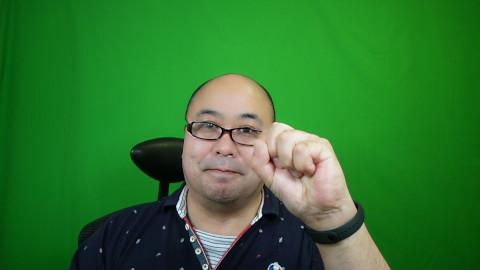

ここまで準備出来たら早速AIで画像を判定してじゃんけんの手を判別してみよう


#PART1 AI画像判定じゃんけんプログラム

In [ ]:
#AI画像判定じゃんけんプログラム
import matplotlib.pyplot as plt #グラフ処理モジュール
from tensorflow import keras #機械学習ライブラリ
from keras.models import load_model
from PIL import Image, ImageOps #Pillow(PIL): 画像処理モジュール
import numpy as np #高速数値計算モジュール
import os #OS操作モジュール
import shutil #フォルダやファイルのコピー、移動、削除するモジュール
from google.colab import files

path = '/content/'
model = load_model(path + '/data/keras_model.h5', compile=False)

Path00 = path + '00nothing'
Path01 = path + '01rock'
Path02 = path + '02scissors'
Path03 = path + '03papar'

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
f = files.upload()
#読み込んだ画像のファイル名
filename = list(f)[0]
print(filename)
image = Image.open(filename)
size = (224, 224)
# 画像をセンタリングし指定したsizeに切り出す処理
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# 例外処理
try:
  data[0] = normalized_image_array
except Exception as e:
  plt.imshow(image)
  print(e)
else:
  prediction = model.predict(data)

# 棒グラフの作成
  left = np.array(['none', 'rock', 'scissors', 'paper'])
  height = prediction[0]
  plt.bar(left, height)
  plt.show()

# 切り出したの画像の表示
plt.imshow(image)

##フォルダ内の写真の振り分けをしよう
keras_model.h5の保存場所 /content/<br>
判別する画像のフォルダ名 /content/images

<font color ="red">撮影した複数のじゃんけんの画像をimagesフォルダにアップロードしよう</font>

In [ ]:
#AI画像自動振り分けじゃんけんプログラム
import matplotlib.pyplot as plt #グラフ処理モジュール
from tensorflow import keras #機械学習ライブラリ
from keras.models import load_model
from PIL import Image, ImageOps #Pillow(PIL): 画像処理モジュール
import numpy as np #高速数値計算モジュール
import os #OS操作モジュール
import shutil #フォルダやファイルのコピー、移動、削除するモジュール
from google.colab import files
import glob # 特定条件に従ったファイルを取得するモジュール
 
path = '/content/'
model = load_model(path + '/data/keras_model.h5', compile=False)

Path00 = path + '00nothing'
Path01 = path + '01rock'
Path02 = path + '02scissors'
Path03 = path + '03papar'

#判定する画像の一覧を配列として取得
file_data = glob.glob(path + 'images/*')
#print(file_data)
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
#f = files.upload()
#読み込んだ画像のファイル名
#filename = list(f)[0]
for filename in file_data:
  image = Image.open(filename)
  size = (224, 224)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  try:
    data[0] = normalized_image_array
  except Exception as e:
    print(e)
  else:
    prediction = model.predict(data)
    # 振り分け
    if prediction[0][0] > 0.7:
      shutil.copy(filename,Path00)
      print("なし")
    elif prediction[0][1] > 0.7:
      shutil.copy(filename,Path01)
      print("ぐー")
    elif prediction[0][2] > 0.7:
      shutil.copy(filename,Path02)
      print("ちょき")
    else:
      shutil.copy(filename,Path03)
      print("ぱー")

#参照
KTP-第2回-画像の加工<br>
https://colab.research.google.com/drive/1ZdEgJDC4l7hHMxECD3ubRMiA7IM1AN_S#scrollTo=FVIkyVmkRnOD<br>
KTP-第3回-Keras-LSTM<br>
https://colab.research.google.com/drive/1gXdjuMjucgfOHUZ-oNtnrVK5G71PCYYI<br>
ファイルの移動<br>
https://www.web-dev-qa-db-ja.com/ja/linux/google-colab%E3%81%A7%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB%E3%82%92%E7%A7%BB%E5%8B%95%E3%81%99%E3%82%8B/806330947/<br>
ディープラーニングのお勉強<br>
https://www.mgo-tec.com/blog-entry-colab-dataset01.html
